<a href="https://colab.research.google.com/github/LilySu/DS-Unit-2-Sprint-4-Practicing-Understanding/blob/master/DS_Unit_2_Sprint_Challenge_4_Practicing_Understanding_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science Unit 2_
 
 # Sprint Challenge: Practicing & Understanding Predictive Modeling

### Chicago Food Inspections

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 2010 to March 2019. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to load the data:

In [244]:
pip install eli5

In [1]:
pip install category_encoders

In [0]:
import pandas as pd
import seaborn as sns
import warnings
import category_encoders as ce
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [0]:


train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)

In [190]:
train = train.iloc[:5000]
test = test.iloc[:1000]
train.shape

(5000, 17)

In [191]:
train.head(1)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1


In [192]:
test.head(1)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,114835,7 - ELEVEN,7 - ELEVEN,46907.0,Grocery Store,Risk 2 (Medium),600 S DEARBORN,CHICAGO,IL,60605.0,2011-03-22T00:00:00,Canvass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.874481,-87.629357,"{'longitude': '-87.62935653990546', 'latitude'...",0


In [193]:
pd.isnull(train).sum()

Inspection ID        0
DBA Name             0
AKA Name            54
License #            0
Facility Type       25
Risk                 0
Address              0
City                 5
State                0
Zip                  2
Inspection Date      0
Inspection Type      0
Violations         922
Latitude            28
Longitude           28
Location            28
Fail                 0
dtype: int64

In [194]:
train.fillna('unknown')

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938,-87.6448,"{'longitude': '-87.6447545707008', 'latitude':...",1
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.7724,-87.6836,"{'longitude': '-87.68360273081268', 'latitude'...",0
2,1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649,2016-04-05T00:00:00,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.7588,-87.5751,"{'longitude': '-87.57505446746121', 'latitude'...",0
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632,2016-04-29T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.8122,-87.7071,"{'longitude': '-87.70712481334274', 'latitude'...",0
4,453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",unknown,unknown,unknown,0
5,1725221,LAKEVIEW REHABILITATION AND NURSING CENTER,LAKEVIEW REHABILITATION AND NURSING CENTER,2245580.0,Long Term Care,Risk 1 (High),735 W DIVERSEY PKWY,CHICAGO,IL,60614,2016-02-22T00:00:00,Canvass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.9326,-87.648,"{'longitude': '-87.64797278441709', 'latitude'...",0
6,1981372,GOLD COAST DOGS,GOLD COAST DOGS,32318.0,Restaurant,Risk 2 (Medium),225 S CANAL ST,CHICAGO,IL,60606,2017-01-12T00:00:00,Canvass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.8785,-87.6394,"{'longitude': '-87.63942745962717', 'latitude'...",0
7,1072403,HAPPY PIZZA,unknown,2241028.0,Restaurant,Risk 1 (High),8710 S HALSTED ST,CHICAGO,IL,60620,2013-05-07T00:00:00,License Re-Inspection,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.7355,-87.6437,"{'longitude': '-87.64374906595162', 'latitude'...",0
8,1464616,THE PUMPING CO INC,THE PUMPING CO,1544937.0,Restaurant,Risk 1 (High),6157 N BROADWAY,CHICAGO,IL,60660,2014-11-28T00:00:00,Canvass,"16. FOOD PROTECTED DURING STORAGE, PREPARATION...",41.994,-87.6602,"{'longitude': '-87.66024237516903', 'latitude'...",1
9,583261,YUMMY YUMMY NOODLES,YUMMY YUMMY NOODLES,2098003.0,Restaurant,Risk 1 (High),2002 S WENTWORTH AVE,CHICAGO,IL,60616,2011-06-01T00:00:00,License,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.8553,-87.632,"{'longitude': '-87.63199264229414', 'latitude'...",1


In [195]:
pd.isnull(X).sum()

Facility Type_1023-CHILDREN'S SERVICES FACILITY           0
Facility Type_Airport Lounge                              0
Facility Type_BANQUET HALL                                0
Facility Type_BAR                                         0
Facility Type_Bakery                                      0
Facility Type_Banquet Hall                                0
Facility Type_Banquet rooms                               0
Facility Type_CATERING/CAFE                               0
Facility Type_CHURCH                                      0
Facility Type_CHURCH KITCHEN                              0
Facility Type_COFFEE KIOSK                                0
Facility Type_COFFEE VENDING MACHINE                      0
Facility Type_COMMISSARY                                  0
Facility Type_CONVENIENCE STORE                           0
Facility Type_CONVENIENT STORE                            0
Facility Type_Catering                                    0
Facility Type_Children's Services Facili

In [0]:
X = X.fillna('unknown')

In [197]:
pd.isnull(X).sum()

Facility Type_1023-CHILDREN'S SERVICES FACILITY           0
Facility Type_Airport Lounge                              0
Facility Type_BANQUET HALL                                0
Facility Type_BAR                                         0
Facility Type_Bakery                                      0
Facility Type_Banquet Hall                                0
Facility Type_Banquet rooms                               0
Facility Type_CATERING/CAFE                               0
Facility Type_CHURCH                                      0
Facility Type_CHURCH KITCHEN                              0
Facility Type_COFFEE KIOSK                                0
Facility Type_COFFEE VENDING MACHINE                      0
Facility Type_COMMISSARY                                  0
Facility Type_CONVENIENCE STORE                           0
Facility Type_CONVENIENT STORE                            0
Facility Type_Catering                                    0
Facility Type_Children's Services Facili

In [198]:
train['Fail'].value_counts(normalize = True)

0    0.7396
1    0.2604
Name: Fail, dtype: float64

In [199]:
train.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Violations', 'Latitude', 'Longitude', 'Location',
       'Fail'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split

def train_validation_test_split(
    X, y, train_size=0.4, val_size=0.4, test_size=0.2, 
    random_state=None, shuffle=True):
        
    assert train_size + val_size + test_size == 1
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size/(train_size+val_size), 
        random_state=random_state, shuffle=shuffle)
    
    return X_train, X_val, X_test, y_train, y_val, y_test


In [201]:
X.dtypes

Facility Type_1023-CHILDREN'S SERVICES FACILITY           uint8
Facility Type_Airport Lounge                              uint8
Facility Type_BANQUET HALL                                uint8
Facility Type_BAR                                         uint8
Facility Type_Bakery                                      uint8
Facility Type_Banquet Hall                                uint8
Facility Type_Banquet rooms                               uint8
Facility Type_CATERING/CAFE                               uint8
Facility Type_CHURCH                                      uint8
Facility Type_CHURCH KITCHEN                              uint8
Facility Type_COFFEE KIOSK                                uint8
Facility Type_COFFEE VENDING MACHINE                      uint8
Facility Type_COMMISSARY                                  uint8
Facility Type_CONVENIENCE STORE                           uint8
Facility Type_CONVENIENT STORE                            uint8
Facility Type_Catering                  

In [202]:
X.isna().sum()

Facility Type_1023-CHILDREN'S SERVICES FACILITY           0
Facility Type_Airport Lounge                              0
Facility Type_BANQUET HALL                                0
Facility Type_BAR                                         0
Facility Type_Bakery                                      0
Facility Type_Banquet Hall                                0
Facility Type_Banquet rooms                               0
Facility Type_CATERING/CAFE                               0
Facility Type_CHURCH                                      0
Facility Type_CHURCH KITCHEN                              0
Facility Type_COFFEE KIOSK                                0
Facility Type_COFFEE VENDING MACHINE                      0
Facility Type_COMMISSARY                                  0
Facility Type_CONVENIENCE STORE                           0
Facility Type_CONVENIENT STORE                            0
Facility Type_Catering                                    0
Facility Type_Children's Services Facili

In [0]:
X = X.fillna('Unknown')


In [204]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [0]:
X = train.drop(columns = ['Inspection ID', 'DBA Name','License #', 'AKA Name', 
       'Address', 'State', 'Zip','Latitude', 'Longitude','Violations','Location', 'Fail'])
y = train['Fail']

In [0]:
X = pd.get_dummies(X)

In [0]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.4, val_size=0.4, test_size=0.2, random_state=1)

In [208]:
X_train.head(1)

,Facility Type_1023-CHILDREN'S SERVICES FACILITY,Facility Type_Airport Lounge,Facility Type_BANQUET HALL,Facility Type_BAR,Facility Type_Bakery,Facility Type_Banquet Hall,Facility Type_Banquet rooms,Facility Type_CATERING/CAFE,Facility Type_CHURCH,Facility Type_CHURCH KITCHEN,Facility Type_COFFEE KIOSK,Facility Type_COFFEE VENDING MACHINE,Facility Type_COMMISSARY,Facility Type_CONVENIENCE STORE,Facility Type_CONVENIENT STORE,Facility Type_Catering,Facility Type_Children's Services Facility,Facility Type_DAYCARE,Facility Type_Daycare (2 - 6 Years),Facility Type_Daycare (2 Years),Facility Type_Daycare (Under 2 Years),Facility Type_Daycare Above and Under 2 Years,Facility Type_Daycare Combo 1586,Facility Type_Daycare Night,Facility Type_Food Vending Machines,Facility Type_GAS STATION,Facility Type_GAS STATION STORE,Facility Type_GAS STATION/STORE,Facility Type_GROCERY STORE/BAKERY,Facility Type_GROCERY STORE/COOKING SCHOOL,Facility Type_GROCERY& RESTAURANT,Facility Type_GROCERY/GAS STATION,Facility Type_GROCERY/RESTAURANT,Facility Type_GROCERY/TAQUERIA,Facility Type_Golden Diner,Facility Type_Grocery & Restaurant,Facility Type_Grocery Store,Facility Type_HEALTH/ JUICE BAR,Facility Type_Hospital,Facility Type_ICE CREAM PARLOR,...,Inspection Date_2019-02-07T00:00:00,Inspection Date_2019-02-11T00:00:00,Inspection Date_2019-02-13T00:00:00,Inspection Date_2019-02-14T00:00:00,Inspection Date_2019-02-15T00:00:00,Inspection Date_2019-02-19T00:00:00,Inspection Date_2019-02-20T00:00:00,Inspection Date_2019-02-21T00:00:00,Inspection Date_2019-02-25T00:00:00,Inspection Date_2019-02-27T00:00:00,Inspection Date_2019-02-28T00:00:00,Inspection Date_2019-03-05T00:00:00,Inspection Date_2019-03-06T00:00:00,Inspection Date_2019-03-08T00:00:00,Inspection Date_2019-03-14T00:00:00,Inspection Date_2019-03-18T00:00:00,Inspection Type_Canvass,Inspection Type_Canvass Re-Inspection,Inspection Type_Complaint,Inspection Type_Complaint Re-Inspection,Inspection Type_Complaint-Fire,Inspection Type_Complaint-Fire Re-inspection,Inspection Type_Consultation,Inspection Type_KIDS CAFE,Inspection Type_License,Inspection Type_License Re-Inspection,Inspection Type_License-Task Force,Inspection Type_NO ENTRY,Inspection Type_No Entry,Inspection Type_Out of Business,Inspection Type_Recent Inspection,Inspection Type_Short Form Complaint,Inspection Type_Short Form Fire-Complaint,Inspection Type_Special Events (Festivals),Inspection Type_Suspected Food Poisoning,Inspection Type_Suspected Food Poisoning Re-inspection,Inspection Type_TASK FORCE LIQUOR 1470,Inspection Type_Tag Removal,Inspection Type_Task Force Liquor 1475,Inspection Type_no entry
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    StandardScaler(), 
    LogisticRegression(solver='lbfgs', max_iter=10)
)

In [210]:
y_pred_proba = cross_val_predict(pipeline, X_train, y_train, cv=3, n_jobs=-1, 
                                 method='predict_proba')[:,1]
y_pred_proba 

array([0.00123676, 0.30096513, 0.00123676, ..., 0.02375101, 0.75254848,
       0.04272146])

In [211]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


class_weight = 'balanced'
model = LogisticRegression(solver='lbfgs', class_weight=class_weight)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))
display(pd.DataFrame(
    confusion_matrix(y_val, y_pred), 
    columns=['Predicted Negative', 'Predicted Positive'], 
    index=['Actual Negative', 'Actual Positive']))


              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1477
           1       0.38      0.49      0.43       523

    accuracy                           0.66      2000
   macro avg       0.59      0.60      0.59      2000
weighted avg       0.69      0.66      0.67      2000

accuracy 0.657


,Predicted Negative,Predicted Positive
Actual Negative,1060,417
Actual Positive,269,254


In [0]:
from sklearn.model_selection import cross_val_predict


pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    StandardScaler(), 
    LogisticRegression(solver='lbfgs', max_iter=10))


In [0]:
# y_pred_proba = cross_val_predict(pipeline, X_train, y_train, cv=3, n_jobs=1, 
#                                  method='predict_proba')[:,1]

In [233]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error


param_distributions = {
     'n_estimators': [100, 200],
     'max_depth': [4, 5]
}

randomsearch = RandomizedSearchCV(
    RandomForestClassifier(n_jobs=-1, random_state=42),
    param_distributions=param_distributions,
    n_iter = 20,
    cv=3,
    scoring='roc_auc',
    verbose=10,
    return_train_score=True
)

randomsearch.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] n_estimators=100, max_depth=4 ...................................
[CV]  n_estimators=100, max_depth=4, score=(train=0.815, test=0.638), total=   0.2s
[CV] n_estimators=100, max_depth=4 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=100, max_depth=4, score=(train=0.801, test=0.619), total=   0.2s
[CV] n_estimators=100, max_depth=4 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=100, max_depth=4, score=(train=0.805, test=0.627), total=   0.2s
[CV] n_estimators=200, max_depth=4 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=200, max_depth=4, score=(train=0.845, test=0.642), total=   0.4s
[CV] n_estimators=200, max_depth=4 ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=200, max_depth=4, score=(train=0.826, test=0.632), total=   0.4s
[CV] n_estimators=200, max_depth=4 ...................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s remaining:    0.0s


[CV]  n_estimators=200, max_depth=4, score=(train=0.834, test=0.652), total=   0.4s
[CV] n_estimators=100, max_depth=5 ...................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=100, max_depth=5, score=(train=0.830, test=0.641), total=   0.2s
[CV] n_estimators=100, max_depth=5 ...................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=100, max_depth=5, score=(train=0.809, test=0.619), total=   0.2s
[CV] n_estimators=100, max_depth=5 ...................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.4s remaining:    0.0s


[CV]  n_estimators=100, max_depth=5, score=(train=0.837, test=0.630), total=   0.2s
[CV] n_estimators=200, max_depth=5 ...................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=200, max_depth=5, score=(train=0.852, test=0.641), total=   0.4s
[CV] n_estimators=200, max_depth=5 ...................................
[CV]  n_estimators=200, max_depth=5, score=(train=0.838, test=0.626), total=   0.4s
[CV] n_estimators=200, max_depth=5 ...................................
[CV]  n_estimators=200, max_depth=5, score=(train=0.855, test=0.650), total=   0.4s


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    4.0s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=-1, 

In [234]:
randomsearch.best_score_

0.6418027239022677

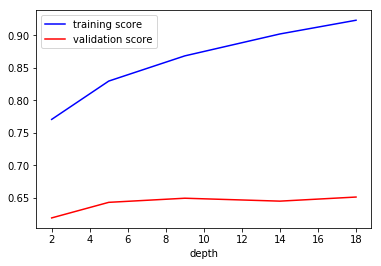

In [216]:
from sklearn.model_selection import validation_curve


model = RandomForestClassifier(n_estimators=100)

depth = [2, 5, 9, 14, 18]#try a variety of parameters for model
train_score, val_score = validation_curve(
    model, X_train, y_train,
    param_name='max_depth', param_range=depth, 
    scoring='roc_auc', cv=3)

plt.plot(depth, np.median(train_score, 1), color='blue', label='training score')
plt.plot(depth, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('depth');

In [237]:
from sklearn.metrics import roc_auc_score
best = randomsearch.best_estimator_
encoder = ce.OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
y_pred_proba = best.predict_proba(X_test.values)[:,1]
print('Test ROC AUC:', roc_auc_score(y_test, y_pred_proba))

Test ROC AUC: 0.6525110105211647


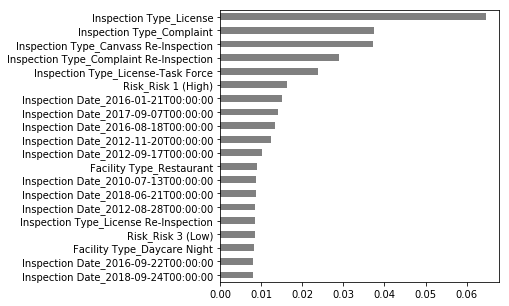

In [238]:
n = 20
figsize = (5,5)

importances = pd.Series(best.feature_importances_,X_train.columns)
top_n = importances.sort_values()[-n:]
plt.figure(figsize=figsize)
top_n.plot.barh(color='gray');

In [243]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(best, scoring='roc_auc', cv='prefit', n_iter=2, random_state=42)#instantiate permuter object

permuter.fit(X_test.values, y_test)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=4,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=200,
                                                       n

In [245]:
feature_names = X_test.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.0444 ± 0.0216,Inspection Type_Canvass Re-Inspection
0.0338 ± 0.0144,Inspection Type_License
0.0301 ± 0.0032,Inspection Type_Complaint
0.0170 ± 0.0075,Inspection Type_Complaint Re-Inspection
0.0111 ± 0.0033,Inspection Type_License Re-Inspection
0.0061 ± 0.0054,Inspection Type_Short Form Complaint
0.0044 ± 0.0075,Risk_Risk 1 (High)
0.0033 ± 0.0018,Facility Type_School
0.0027 ± 0.0008,Inspection Date_2010-05-20T00:00:00
0.0021 ± 0.0002,City_Chicago


In [0]:
train = train.fillna('unknown')

In [218]:
train.head(1)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938,-87.6448,"{'longitude': '-87.6447545707008', 'latitude':...",1


In [224]:
trainrisk = train.groupby('Risk')['Inspection ID'].nunique()
trainrisk

Risk
Risk 1 (High)      37731
Risk 2 (Medium)    10136
Risk 3 (Low)        4037
Name: Inspection ID, dtype: int64

In [177]:
train.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Violations', 'Latitude', 'Longitude', 'Location',
       'Fail'],
      dtype='object')

In [228]:
trainfacility = train.groupby('Facility Type')['Inspection ID'].nunique()
trainfacility.sort_values(ascending = False)

Facility Type
Restaurant                                         34264
Grocery Store                                       6904
School                                              3876
Bakery                                               846
Daycare (2 - 6 Years)                                830
Children's Services Facility                         802
Daycare Above and Under 2 Years                      656
Long Term Care                                       394
Catering                                             304
Mobile Food Dispenser                                280
Liquor                                               261
Daycare Combo 1586                                   227
Wholesale                                            203
Golden Diner                                         162
Mobile Food Preparer                                 159
Hospital                                             141
TAVERN                                                88
Shared Kitchen Us

In [229]:
traininsp = train.groupby('Inspection Type')['Inspection ID'].nunique()
traininsp.sort_values(ascending = False)

Inspection Type
Canvass                                   24170
License                                    7825
Canvass Re-Inspection                      6346
Complaint                                  4948
License Re-Inspection                      3002
Complaint Re-Inspection                    2241
Short Form Complaint                       2103
License-Task Force                          214
Suspected Food Poisoning                    207
Consultation                                189
Tag Removal                                 146
Out of Business                             109
Task Force Liquor 1475                       92
Recent Inspection                            66
Suspected Food Poisoning Re-inspection       58
Complaint-Fire                               51
Short Form Fire-Complaint                    36
Special Events (Festivals)                   21
No Entry                                     21
Package Liquor 1474                          16
Complaint-Fire Re-inspec

##*   What does Gradient Descent seek to minimize?
Gradient Descent seeks to minimize the cost function when the prediction results in a monotonic relationship to target. 
##*   What is the "Learning Rate" and what is its function?
The learning rate is the intensity of steps that are sampled, the function of which is to find the global minima. 


### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding. (Pandas, category_encoders, sklearn.preprocessing, or any other library.)

_To earn a score of 3 for this part, find and explain leakage. The dataset has a feature that will give you an ROC AUC score > 0.90 if you process and use the feature. Find the leakage and explain why the feature shouldn't be used in a real-world model to predict the results of future inspections._

### Part 2: Modeling

**Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) **Use cross-validation** to **do hyperparameter optimization**, and **estimate your ROC AUC** validation score.

Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70 (without using the feature with leakage)._


### Part 3: Visualization

Make one visualization for model interpretation. (You may use any libraries.) Choose one of these types:

- Feature Importances
- Permutation Importances
- Partial Dependence Plot
- Shapley Values

_To earn a score of 3 for this part, make at least two of these visualization types._

### Part 4: Gradient Descent

Answer both of these two questions:

- What does Gradient Descent seek to minimize?
- What is the "Learning Rate" and what is its function?

One sentence is sufficient for each.

_To earn a score of 3 for this part, go above and beyond. Show depth of understanding and mastery of intuition in your answers._